In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import plotly.express as px
%matplotlib inline


In [74]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [75]:
TEST_ORIGINAL = test.copy()
TRAIN_ORIGINAL = train.copy()

In [76]:
test.columns,train.columns

(Index(['ID', 'Datetime'], dtype='object'),
 Index(['ID', 'Datetime', 'Count'], dtype='object'))

In [77]:
train['Datetime'] = pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
test['Datetime'] = pd.to_datetime(test.Datetime,format="%d-%m-%Y %H:%M")

In [78]:
TEST_ORIGINAL['Datetime'] = pd.to_datetime(TEST_ORIGINAL.Datetime,format="%d-%m-%Y %H:%M")
TRAIN_ORIGINAL['Datetime'] = pd.to_datetime(TRAIN_ORIGINAL.Datetime,format="%d-%m-%Y %H:%M")

In [79]:
for i in (train,test,TRAIN_ORIGINAL,TEST_ORIGINAL):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [80]:
train['day_of_week'] = train.Datetime.dt.day_of_week

In [81]:
weekends = lambda x : True if(x == 5 or x == 6) else False 
train['weekend'] = train.day_of_week.apply(weekends)

In [82]:
train.index = train.Datetime

In [83]:
train.drop(['ID','Datetime'],axis=1,inplace=True)

In [84]:
train

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,True
2012-08-25 01:00:00,2,2012,8,25,1,5,True
2012-08-25 02:00:00,6,2012,8,25,2,5,True
2012-08-25 03:00:00,2,2012,8,25,3,5,True
2012-08-25 04:00:00,2,2012,8,25,4,5,True
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,False
2014-09-25 20:00:00,732,2014,9,25,20,3,False
2014-09-25 21:00:00,702,2014,9,25,21,3,False


# Analytics

<AxesSubplot:xlabel='year'>

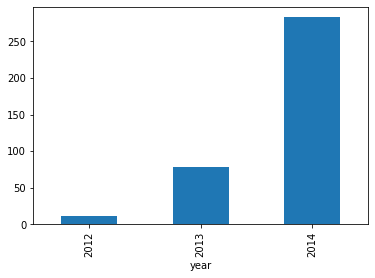

In [85]:
train.groupby('year')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

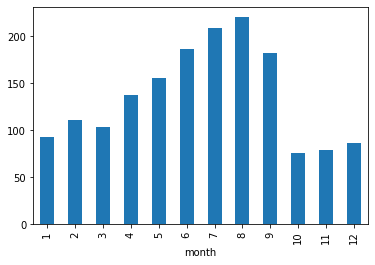

In [86]:
train.groupby('month')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='day'>

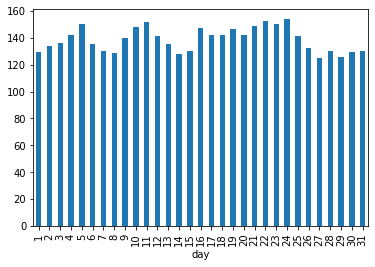

In [87]:
train.groupby('day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='hour'>

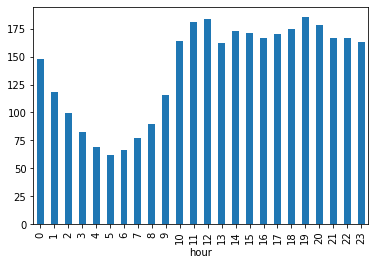

In [88]:
train.groupby('hour')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='year,month'>

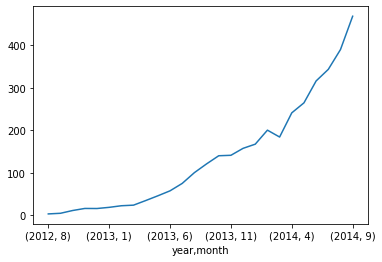

In [89]:
train.groupby(['year','month'])['Count'].mean().plot()

<AxesSubplot:xlabel='day_of_week'>

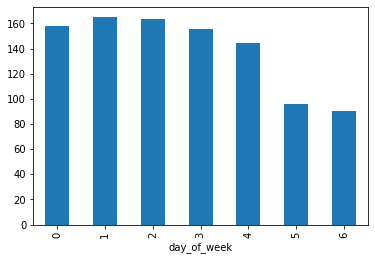

In [90]:
train.groupby('day_of_week')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='weekend'>

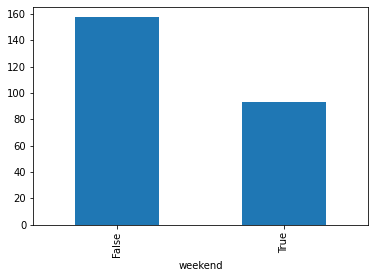

In [91]:
train.groupby('weekend')['Count'].mean().plot.bar()

In [95]:
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()


In [96]:
hourly

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,True
2012-08-25 01:00:00,2,2012,8,25,1,5,True
2012-08-25 02:00:00,6,2012,8,25,2,5,True
2012-08-25 03:00:00,2,2012,8,25,3,5,True
2012-08-25 04:00:00,2,2012,8,25,4,5,True
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,False
2014-09-25 20:00:00,732,2014,9,25,20,3,False
2014-09-25 21:00:00,702,2014,9,25,21,3,False


In [97]:
daily

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,True
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,True
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,False
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,False
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,False
...,...,...,...,...,...,...,...
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,True
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,False
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,False


In [98]:
weekly

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-26,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,3.654762,2012.0,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,3.119048,2012.0,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,4.714286,2012.0,9.000000,20.000000,11.5,3.0,0.285714
...,...,...,...,...,...,...,...
2014-08-31,418.023810,2014.0,8.000000,28.000000,11.5,3.0,0.285714
2014-09-07,446.190476,2014.0,9.000000,4.000000,11.5,3.0,0.285714
2014-09-14,392.297619,2014.0,9.000000,11.000000,11.5,3.0,0.285714


In [99]:
monthly

,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-31,2.952381,2012.0,8.0,28.0,11.5,3.000000,0.285714
2012-09-30,4.444444,2012.0,9.0,15.5,11.5,3.166667,0.333333
2012-10-31,10.986559,2012.0,10.0,16.0,11.5,2.806452,0.258065
2012-11-30,15.827778,2012.0,11.0,15.5,11.5,3.033333,0.266667
2012-12-31,15.680108,2012.0,12.0,16.0,11.5,3.064516,0.322581
2013-01-31,18.430108,2013.0,1.0,16.0,11.5,2.903226,0.258065
2013-02-28,22.190476,2013.0,2.0,14.5,11.5,3.000000,0.285714
2013-03-31,23.588710,2013.0,3.0,16.0,11.5,3.193548,0.322581
2013-04-30,34.405556,2013.0,4.0,15.5,11.5,2.833333,0.266667


<AxesSubplot:title={'center':'monthly'}, xlabel='Datetime'>

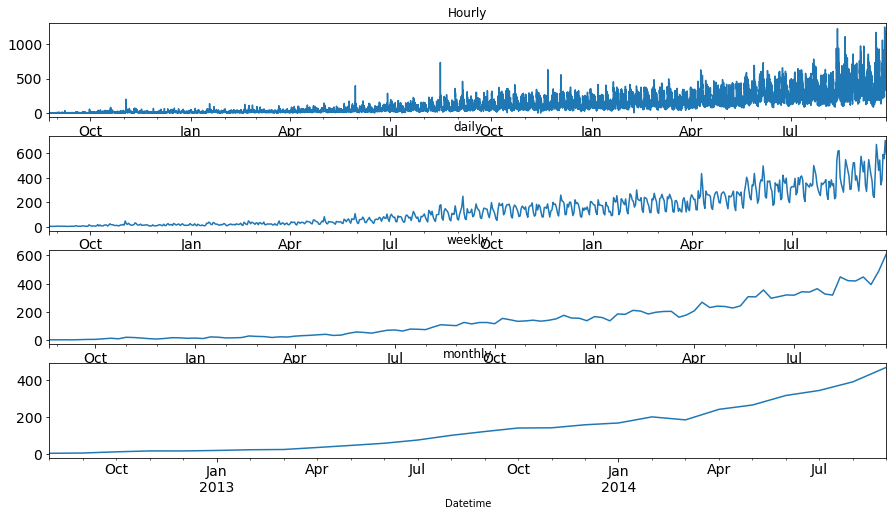

In [106]:
fig,axis = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=14,ax=axis[0])
daily.Count.plot(figsize=(15,8),title='daily',fontsize=14,ax=axis[1])
weekly.Count.plot(figsize=(15,8),title='weekly',fontsize=14,ax=axis[2])
monthly.Count.plot(figsize=(15,8),title='monthly',fontsize=14,ax=axis[3])